In [1]:
# night theme (with jupyterthemes)
#!jt -t monokai -f fira -fs 10 -nf ptsans -nfs 11 -N -kl -cursw 2 -cursc r -cellw 95% -T
# standard theme
#!jt -r

# Inversion tomographique

## Présentation du sujet

### Introduction

La tomographie est une technique d'imagerie, utilisée en physique médicale, géophysique, astrophysique, ..., qui permet de reconstruire un objet en volume (en dimension n) à partir d'une série de mesures en dimension n-1.

Un exemple est celui de la tomographie à rayons X en imagerie médicale.

<img src="images/xrays_tomography.png">

Un faisceau monochromatique de rayons X traversant des tissus biologiques subit une variation d’énergie. Si $f(\textbf x)$ représente l'atténuation d'énergie en le point $\textbf x$ du volume traversé par le rayon, alors l'intensité transmise $I$ en fonction de l'intensité incidente $I_0$ du rayon est donnée par $I=I_0\exp(-\int_Df)$.

La fonction $f(\textbf x)$, qui représente l'atténuation d'énergie en le point $\textbf x$, est fortement liée à la densité et au type du tissu en $\textbf x$. Dans ce TP, pour simplifier, on considère que $f(\textbf x)$ est tout simplement égale à la densité du tissu en le point $\textbf x$. Ainsi, reconstruire $f$ permet de visualiser les tissus biologiques.

<img src="images/xrays_tomography.png">

Sur la figure ci-dessus, est représenté un faisceau de rayons X dans la direction $v$, qui fournit une suite de points (projections) sur la droite $u$ d'angle $\theta$. En chaque point de cette droite (qu'on repère par la distance algébrique $\rho$ au point atteint par le rayon qui traverse le tissu en son centre), on mesure ainsi $I(\rho,\theta)=I_0\exp(-\int_{D(\rho,\theta)}f)$, ce qui nous donne encore la quantité $\int_{D(\rho,\theta)}f$ qu'on note $p_\theta(u)$.

Mises bout à bout, les quantités $p_\theta(u)$ constituent un *sinogramme*.

[Exemple de sinogramme réel](https://www.semanticscholar.org/paper/Iterative-Reconstruction-Algorithms-for-X-ray-Rezvani/e7beb63700aa226917c27d38f513887cf572a5b9)
<img src="images/real_sinogram.jpg">

Ici, chaque ligne du sinogramme correspond à un angle $\theta\in[0,\pi[$. L'axe des abscisses indique la distance algébrique $\rho$ du rayon considéré au centre de l'image de droite. L'image de droite a été reconstruite à l'aide du sinogramme, en utilisant une méthode d'inversion.

Mathématiquement, la mesure $p_\theta(u)$ est donnée par la transformée de Radon de $f$ appliquée en $(\rho,\theta)$, qu'on note $\mathcal Rf(\rho,\theta)$.

### Transformée de Radon

La transformée de Radon est un opérateur à noyau (ou opérateur intégral - c'est un opérateur linéaire défini à l'aide d'une intégrale paramétrique sur un espace fonctionnel), qui associe à une fonction $f$ définie sur le plan ($f\in\mathbb R^{\mathbb R^2}$), une fonction réelle $\mathcal R f$ définie sur l'espace des droites du plan (qui est un espace de dimension 2).

Soit $f(\textbf x) = f(x,y)$ continue, vérifiant :
- $\displaystyle\int_{\mathbb R^2}\dfrac{\vert f(\textbf x)\vert }{\|x\|_2}d\textbf x\quad$ converge
- $\forall\textbf x\in\mathbb R^2,\quad \underset{r\to\infty}{\lim}\displaystyle\int_0^{2\pi}f(x_1+r\cos\phi,x_2+r\sin\phi)d\phi=0\quad$ (l'intégrale le long d'un cercle tend vers 0 lorsque le rayon tend vers l'infini)

On peut alors définir la transformée de Radon de $f$ comme la fonction qui à une droite $L$ associe l'intégrale curviligne

$$
\mathcal Rf(L) = \int_L f
$$

Soit une droite L définie par des coordonnées polaires $(\rho, \theta)$ où $\rho\in]-\infty,\infty[$ est sa distance algébrique à l'origine, et $\theta\in[0,\pi[$ est l'angle qu'elle fait avec l'axe des abscisses. On obtient une expression analytique de l'intégrale en donnant une paramétrisation de la droite L :

Si $\textbf x\in L$, alors $\textbf x=\begin{pmatrix}\rho\cos(\theta)-s\sin(\theta)\\ \rho\sin(\theta)+s\cos(\theta)\end{pmatrix}\quad$ en notant $s$ la distance algébrique entre $\textbf x$ et le point $\begin{pmatrix}\rho\cos(\theta)\\ \rho\sin(\theta)\end{pmatrix}$. S'ensuit la paramétrisation de la droite L : $L=\{\pmb\gamma(s)\;|\; s\in\mathbb R\}$ avec $\pmb\gamma(s)=\begin{pmatrix}\rho\cos(\theta)-s\sin(\theta)\\ \rho\sin(\theta)+s\cos(\theta)\end{pmatrix}$.

On a donc :

$$
\begin{align}
\mathcal Rf(L) &= \int_L f = \int_{-\infty}^{+\infty} f(\pmb\gamma(s)) \vert \pmb\gamma'(s)\vert ds\\
&= \int_{-\infty}^{+\infty} f(\rho\cos(\theta)-s\sin(\theta), \rho\sin(\theta)+s\cos(\theta)) \times \left( (-\sin(\theta))^2+ (\cos(\theta))^2\right) ds\\
&= \int_{-\infty}^{+\infty} f(\rho\cos(\theta)-s\sin(\theta), \rho\sin(\theta)+s\cos(\theta)) \, ds
\end{align}
$$

On peut également définir l'intégrale associée à la transformée de Radon à l'aide de distributions de Dirac. En effet, $\begin{pmatrix}x\\y\end{pmatrix}\in L \Leftrightarrow \rho = x\cos(\theta)+y\sin(\theta)\quad$ car $\begin{pmatrix}x\\y\end{pmatrix}\in L \Leftrightarrow y=\dfrac\rho {\cos(\theta+\frac\pi 2)}+x\tan(\theta-\frac\pi 2)$ donc $\rho=y\sin(\theta)+x\cos(\theta)$.

Ainsi, on a intuitivement (en écrivant les Dirac comme des fonctions pour simplifier) :
$$
\mathcal Rf(\theta,\rho) = \iint_{\mathbb R^2} f(x,y)\delta_\rho(x\cos(\theta)+y\sin(\theta))dxdy
$$
ou plus formellement :
$$
\mathcal Rf(\theta,\rho) = \langle \delta_\rho\circ\left[\begin{pmatrix}x\\y\end{pmatrix}\mapsto x\cos(\theta)+y\sin(\theta)\right], f\rangle
$$

<img src="images/Radon_transform_sinogram.gif">

(Source : [Wikipedia](https://en.wikipedia.org/wiki/Radon_transform))

$\mathcal Rf(\theta,\rho)$ représente ainsi l'intégrale de $f$ le long d'une droite $L$ orientée suivant l'angle $\theta+\dfrac\pi 2$ et translatée de $\rho$ suivant la direction $\theta$.

## Définition du problème

### Import des libraries

In [2]:
import math
import numpy as np
import numpy.linalg as npl
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from skimage.transform import radon, rescale, rotate, iradon_sart, warp
from scipy import fft

### Choix des images

On travaillera essentiellement avec le  Fantôme de Shepp-Logan, qui présente l'avantage d'être suffisamment loin des bords pour ne pas être rogné au cours des rotations de l'image, et est couramment utilisé dans la littérature. L'image est noire (les valeurs des pixels sont nulles) au dehors du cercle inscrit en son sein.  Par défaut, la fonction `radon` de `skimage.transform` suppose justement que l'image est nulle au dehors du cercle inscrit (`circle=True`). Pour calculer le sinogramme, les images carrées sont tournées autour de leurs centres - donnés par `(image.shape[0]//2, image.shape[1]//2)`, et les régions qui "dépassent" sont tout simplement exclues, ce qui ne pose pas de problème puisqu'elles sont hors des cercles inscrits. La largeur (la taille du vecteur) de chaque projection, donc la première dimension du sinogramme, est alors égale à la dimension min. de l'image (qui est aussi le diamètre du cercle inscrit). Afin de pouvoir s'intéresser spécifiquement à l'impact du choix de l'algorithme utilisé pour effectuer la rotation, on travaillera également avec une autre image - de Mickey - qui n'est pas nulle en dehors du cercle inscrit et n'est pas même carrée.

In [3]:
im=np.array(Image.open("images/SheppLogan_Phantom.svg.png").convert('L')) # Shepp-Logan
sim = rescale(im, scale=0.2, preserve_range=True, mode='reflect') # Shepp-Logan (smaller)
ssim = rescale(im, scale=0.1, preserve_range=True, mode='reflect') # Shepp-Logan (even smaller)
im2=np.array(Image.open("images/mickey.jpeg").convert('L')) # Mickey
sim2 = rescale(im2, scale=0.2, preserve_range=True, mode='reflect') # Mickey (smaller)

### Définition d'une fonction d'affichage pour la suite du projet

In [4]:
from utils import printims

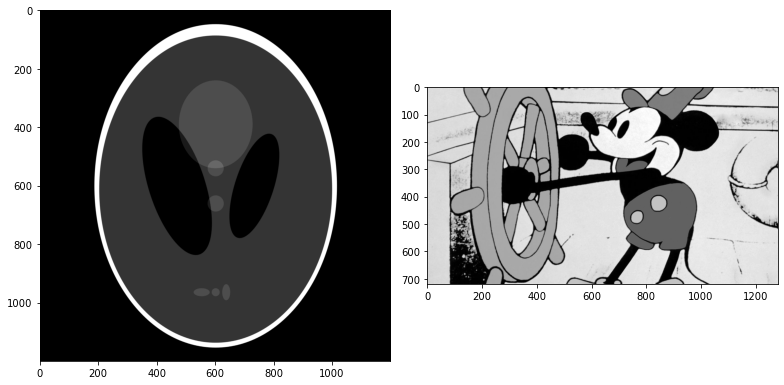

In [5]:
printims([im, im2])

## Transformée de Radon

### Avec `radon` de la librairie `skimage.transform`

#### Application au fantôme de Shepp-Logan

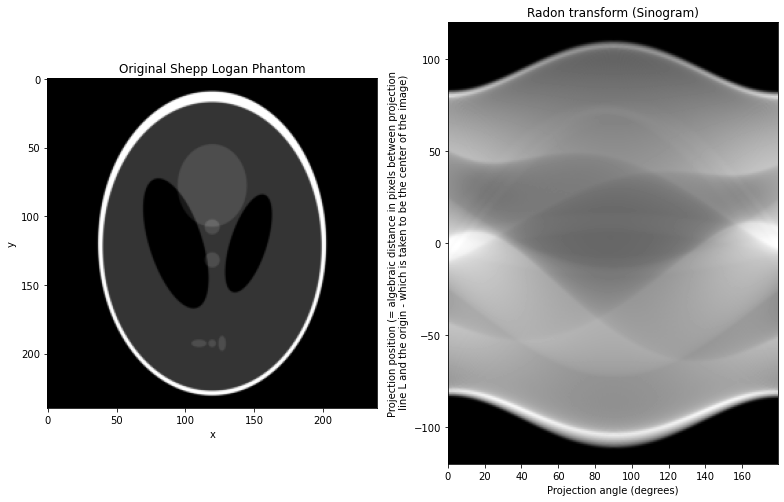

In [6]:
thetas = np.linspace(0., 180., max(sim.shape), endpoint=False)

sinogram = radon(sim, theta=thetas)

printims([sim, sinogram], titles=["Original Shepp Logan Phantom", "Radon transform (Sinogram)"],
         xlabels=["x", "Projection angle (degrees)"],
         ylabels=["y",
                  "Projection position (= algebraic distance in pixels between projection\n line L and the origin - which is taken to be the center of the image)"],
         extents=[None, (thetas[0], thetas[-1], -sinogram.shape[0]/2, sinogram.shape[0]/2)])

Le domaine de la transformée de Radon effectuée à l'aide de `radon` est constitué d'éléments de la forme $(\theta, s)$ où $\theta$ est l'angle que fait le vecteur normal à la droite de projection L considérée avec l'axe x. La droite L est orienté selon l'angle $\theta+\dfrac{\pi}{2}$ (ainsi, la transformée de radon d'une ligne de l'image d'origine correspond à l'angle $\theta=90°$ ; alors que l'angle $0°$ correspond à une colonne sur l'image d'origine), et $s$ est la distance (algébrique) en pixels entre la ligne L et l'origine (le centre de l'image). La distance étant prise algébrique, l'intervalle des angles de projection $[0,\pi[$ suffit à parcourir tout le domaine.

Une rotation d'angle $\theta_0$ de l'image $f$ est équivalente à un décalage de phase de $\theta_0$ dans le domaine de Radon :

$$
\mathcal{R}\left(\textrm{Rot}_{\theta_0}f\right)(\theta, \rho)=\mathcal{R}f\left(\theta+\theta_0,\rho\right)
$$

où $\textrm{Rot}_{\theta_0}f$ est le tiré en arrière de f par la rotation d'angle $\theta_0$, ie si $g$ est une fonction de $\theta$, $\quad\textrm{Rot}_{\theta_0}g(\theta)\overset{\Delta}{=}g(\theta-\theta_0)$.

Ce faisant, lorsqu'on réimplémentera la transformée de Radon et les différentes méthodes d'inversion dans la suite, on tournera simplement l'image dans le sens **anti-trigonométrique** d'un angle $\theta-\dfrac \pi 2$ (par exemple à l'aide de la fonction `rotate` de `skimage.transform` - on s'abstient ainsi d'implémenter l'interpolation bilinéaire, qui est déjà implémentée dans `rotate`) et on projetera le long de lignes (c'est-à-dire on évaluera la transformée de Radon en $\dfrac\pi 2$), lorsqu'il s'agira de calculer la transformeé de Radon de $f$ en $\theta$ :

$$
\mathcal{R}f\left(\theta, \rho\right) \underset{\theta_0=\theta-\frac\pi 2}{=} \mathcal{R}f\left(\dfrac\pi 2+\theta_0, \rho\right) = \mathcal{R}\left(\textrm{Rot}_{\theta-\frac\pi 2}f\right)(\dfrac\pi 2, \rho)
$$

En d'autres termes, lorsqu'on voudra projeter le long d'une droite L orientée suivant un angle $\theta+\dfrac{\pi}{2}$, au lieu d'effecteur le calcul direct de la transformée de Radon en $(\theta, \rho)$, on tournera l'image d'un angle $\dfrac\pi 2 -\theta$ dans le sens **trigonométrique** et on calculera la transformée de Radon de $\textrm{Rot}_{\theta-\frac \pi 2}f$ en $\dfrac \pi 2$.

La première colonne du sinogramme ($\theta=0$) correspond alors bien aux droites L orientées suivant l'angle 
$\theta+\dfrac\pi 2=90°$, c'est-à-dire aux colonnes de l'image d'origine. Le point au milieu de cette première colonne du sinogramme, correspond à la valeur de la projection selon la droite verticale qui coupe l'image d'origine en son centre.

#### Mickey (image non-nulle hors du cercle inscrit)

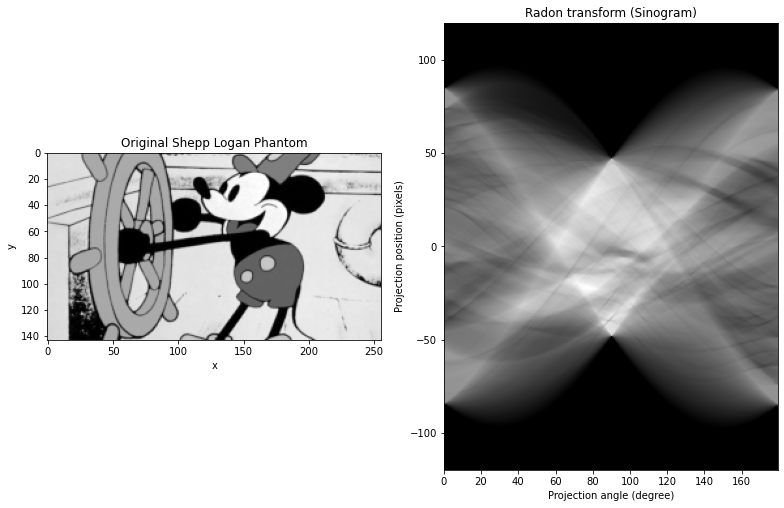

In [7]:
thetas = np.linspace(0., 180., max(sim2.shape), endpoint=False)

sinogram2 = radon(sim2, theta=thetas, circle=False)

printims([sim2, sinogram2], titles=["Original Shepp Logan Phantom", "Radon transform (Sinogram)"],
         xlabels=["x", "Projection angle (degree)"], ylabels=["y", "Projection position (pixels)"],
         extents=[None, (thetas[0], thetas[-1], -sinogram.shape[0]/2, sinogram.shape[0]/2)])

In [8]:
print(sim2.shape)
print(sinogram2.shape)
math.sqrt(sum(np.array(sim2.shape)**2))

(144, 256)
(363, 256)


293.7209560109731

In [9]:
math.sqrt(2*256**2)

362.03867196751236

On comprend que la fonction `radon` de `skimage.transform` a complété l'image avec des zéros de sorte à la centrer dans un carré de côté sa plus grande dimension (un carré 256 par 256, donc de diagonale ~363) ; puis a à nouveau complété l'image avec des zéros de sorte à la centrer dans un carré de taille 363 par 363, qui est la plus petite image dans le cercle inscrit de laquelle est contenu le **carré** de 256 par 256. L'intérêt est vraisemblablement  de pouvoir calculer la transformée de `radon` par rotations successives de l'image, sans perdre d'information ; comme nous allons le faire dans la suite. Notre méthode diffère cependant légèrement, en ce qu'on a choisi d'agrandir directement toute image rectangulaire de taille (L, h) en la centrant dans un carré noir de côté $\sqrt{L^2+h^2}$, ce qui suffit également à ne pas perdre d'information au cours des rotations. Cette image carré est la plus petite image dans le cercle inscrit de laquelle est contenu le **rectangle** d'origine de taille 144 par 256.

### Transformée de Radon "à la main"

#### Rotation de l'image avec `rotate`

On conserve l'interpolation linéaire, qui est celle utilisé par défaut par `rotate`. Dans le cas où l'image considérée n'est pas nulle au dehors du cercle inscrit, on l'agrandit de sorte à ce qu'elle le soit (`pad="small"`). On essaye également de reproduire ce qui semble être fait par la fonction `radon` de `skimage.transform` (`pad="large"`).

La fonction `rotate_custom` prend en entrée une image, un angle ; et renvoit l'image tournée de la valeur de l'angle dans le sens anti-trigonométrique.

In [10]:
def rotate_custom(image, angle, pad=None):
    if pad is None:
        return rotate(image, -angle, order=1, preserve_range=True)
    elif pad=="small":
        shape = np.array(image.shape)    
        D = math.ceil(np.sqrt(sum(shape**2)))
        d0, d1 = (D-shape)//2
        return rotate(np.pad(image, ((d0, d0), (d1, d1)), mode='constant', constant_values=0),
                      -angle, order=1, preserve_range=True)
    elif pad=="large":
        shape = np.array(image.shape)    
        D = math.ceil(np.sqrt(2*max(shape)**2))
        d0, d1 = (D-shape)//2
        return rotate(np.pad(image, ((d0, d0+1), (d1, d1+1)), mode='constant', constant_values=0),
                      -angle, order=1, preserve_range=True)

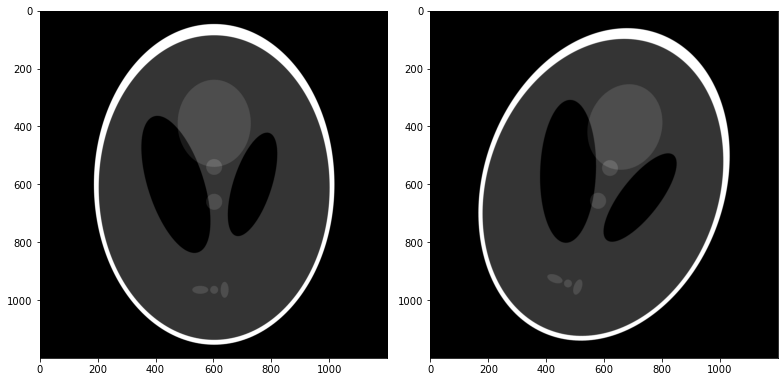

In [11]:
printims([im, rotate_custom(im, 20)])

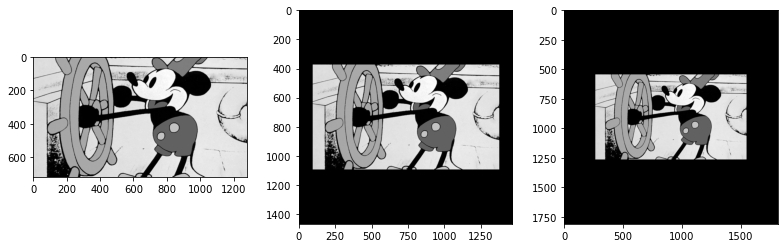

In [12]:
printims([im2, rotate_custom(im2, 0, "small"), rotate_custom(im2, 0, "large")])

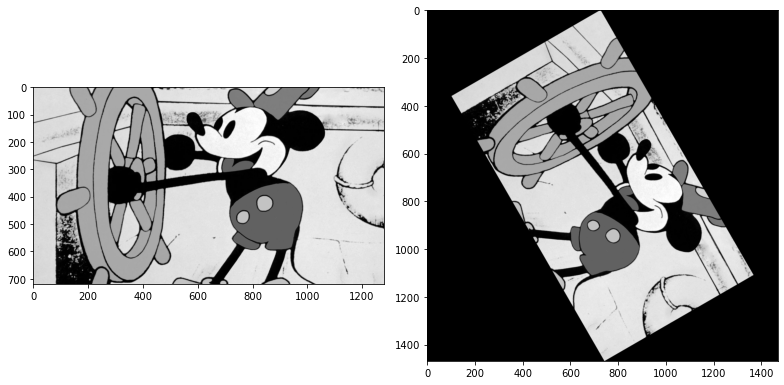

In [13]:
printims([im2, rotate_custom(im2, 60, "small")])

On constate que l'image d'origine est effectivement dans le cercle inscrit dans l'image ainsi agrandie !

In [14]:
from utils import draw_circle

In [15]:
padded = rotate_custom(im2, 0, "small")
circle = draw_circle(padded.shape[0])
rotated1 = np.clip(rotate_custom(im2, 60, "small") + circle, 0, 255)
rotated2 = np.clip(padded + circle, 0, 255)
rotated3 = np.clip(rotate_custom(im2, 150, "small") + circle, 0, 255)

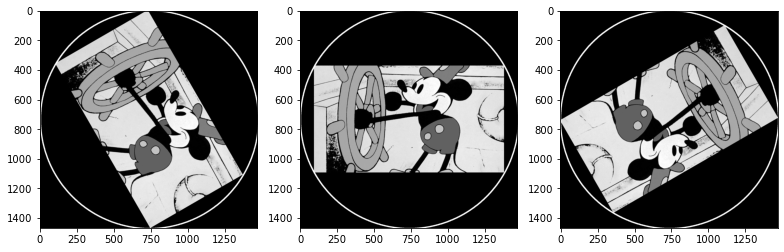

In [16]:
printims([rotated1, rotated2, rotated3])

#### Transformée de Radon avec `rotate`

Rappelons que
$$
\mathcal{R}f\left(\theta, \rho\right) = \mathcal{R}\left(\textrm{Rot}_{\theta-\frac\pi 2}f\right)(\dfrac\pi 2, \rho)
$$

Et qu'évaluer la transformée de Radon en $\theta = \dfrac\pi 2$ équivaut à calculer les projections le long de lignes.

Par convention, on compose le sinogramme des projections pour $\theta$ variant de 0 à $\pi$. Il s'agit donc de faire tourner l'image, dans le sens anti-trigonométrique, d'angles variant entre $-\frac\pi 2$ et $\frac\pi 2$.

In [17]:
def RT1(image, pad=None, angles=None):
    if angles is None:
        angles = np.linspace(-90., 90., max(image.shape), endpoint=False)
        
    sino = np.array([rotate_custom(image,angles[i],pad).sum(axis=1)[::-1] for i in range(len(angles))]).T
    return sino

# Note that [::-1] flips the image wrt the horizontal axis, ie flip each column of the final sinogram
# wrt its center
# This way, for theta=pi/2, the last line of the sinogram correspond to the first line of the image
# This is the expected behavior because of the "reversed y axis" we observe in all python plots

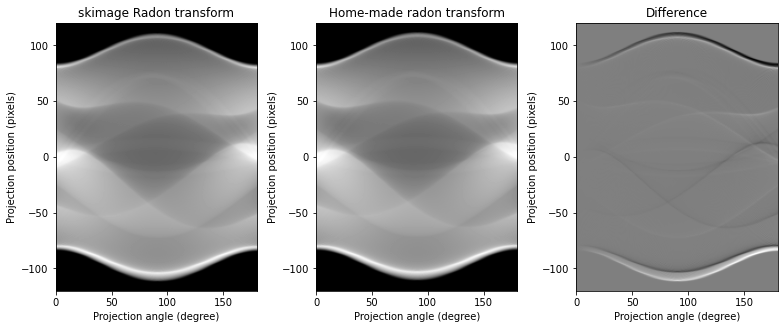

In [18]:
sino = RT1(sim)

printims([sinogram, sino, sinogram-sino],
         titles=["skimage Radon transform", "Home-made radon transform", "Difference"],
         xlabels=["Projection angle (degree)"]*3,
         ylabels=["Projection position (pixels)"]*3,
         extents=[(0, 180.0, -sinogram.shape[0]/2, sinogram.shape[0]/2)]*3)

L'allure est, à l'oeil, indiscernable de celle de `radon` ; mais on voit que la différence est non nulle. Nous avons vérifié qu'elle ne tient pas au fait de projeter le long de lignes (en faisant varier $\theta$ de $-\dfrac\pi 2$ à $\dfrac\pi 2$) plutôt que le long de colonnes (en faisant varier $\theta$ de $0$ à $\pi$) comme ce qui est fait dans le code de `radon`. La différence semble venir de l'utilisation de `rotate` plutôt que de `warp`, que nous allons tester plus loin.

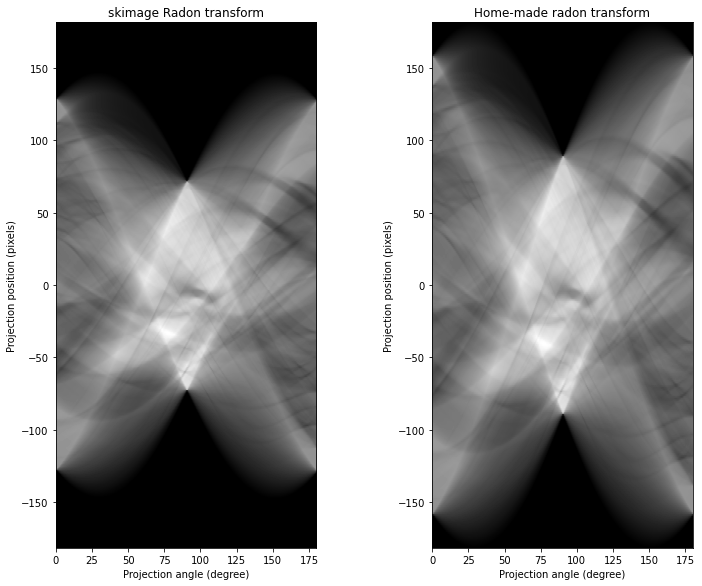

In [19]:
sino2 = RT1(sim2, pad="small")

printims([sinogram2, sino2], titles=["skimage Radon transform", "Home-made radon transform"],
         xlabels=["Projection angle (degree)"]*2, ylabels=["Projection position (pixels)"]*2,
         extents=[(0, 180.0, -sinogram2.shape[0]/2, sinogram2.shape[0]/2)]*2)

On obtient une allure très similaire pour le sinogramme de Mickey également. La différence sur la taille du sinogramme vient de notre choix de padding, qui est suffisant pour que l'information soit dans le cercle inscrit, mais moins large que le padding ajouté par `radon`. On le reproduit ci-dessous :

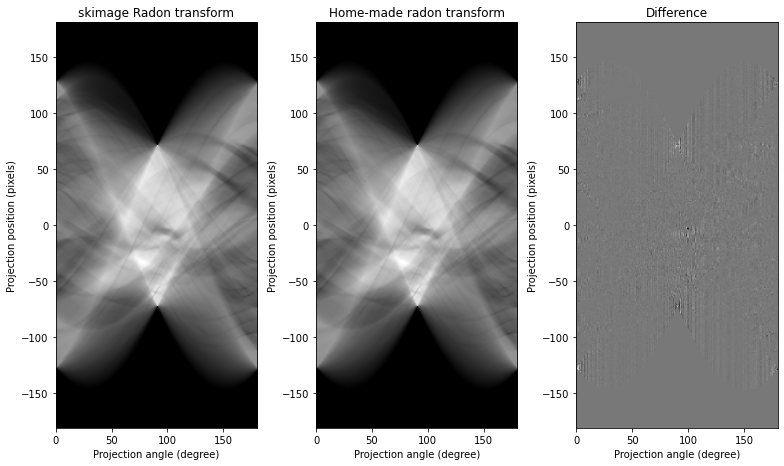

In [20]:
sino3 = RT1(sim2, pad="large")

printims([sinogram2, sino3, sinogram2-sino3],
         titles=["skimage Radon transform", "Home-made radon transform", "Difference"],
         xlabels=["Projection angle (degree)"]*3,
         ylabels=["Projection position (pixels)"]*3,
         extents=[(0, 180.0, -sinogram2.shape[0]/2, sinogram2.shape[0]/2)]*3)

Les sinogrammes obtenus avec notre fonction `RT1` ont très largement la même allure que ceux obtenus avec `radon`, mais il y a bien des différences imperceptibles à l'oeil.

Afin de palier à ces différences, on réalise une autre implémentation de la transformée de Radon, en utilisant `warp` de `skimage.transform` qui permet de transformer des images en s'appuyant sur les changements de coordonnées associées - en l'occurence rotation/translation ; car c'est la fonction utilisée dans le code source de `radon`. On aura alors précisément les mêmes sinogrammes (pour des images carrées). On en profitera pour projeter les images ainsi tournées le long de colonnes plutôt que de lignes, en exploitant alors le fait que :

$$
\mathcal{R}f\left(\theta, \rho\right) \underset{\theta_0=\theta}{=} \mathcal{R}f\left(0+\theta_0, \rho\right) = \mathcal{R}\left(\textrm{Rot}_{\theta}f\right)(0, \rho)
$$

#### Transformée de Radon avec `warp`

Afin de réduire l'écart avec `radon` - ce qui nous facilitera la tâche pour comparer les méthodes d'inversion, on essaie également d'implémenter une transformée de Radon basée sur la fonction `warp`, qui permet de transformer une image en se basant sur un changement de variables, et est celle utilisée dans le code source de `radon`. `warp` prend en argument `inverse_map`, l'application qui transforme les nouvelles coordonnées en les anciennes. L'application en question peut être donnée sous la forme d'une matrice de transformation 3 par 3, de la même forme que celle utilisée par : [`skimage.transform.SimilarityTransform`](https://scikit-image.org/docs/dev/api/skimage.transform.html?highlight=radon#skimage.transform.SimilarityTransform).

In [21]:
def RT2(image, pad=None, angles=None):
    if pad is None:
        padded_image = image
    elif pad=="small":
        shape = np.array(image.shape)    
        D = math.ceil(np.sqrt(sum(shape**2)))
        d0, d1 = (D-shape)//2
        padded_image = np.pad(image, ((d0, d0), (d1, d1)), mode='constant', constant_values=0)
    elif pad=="large":
        shape = np.array(image.shape)    
        D = math.ceil(np.sqrt(2*max(shape)**2))
        d0, d1 = (D-shape)//2
        padded_image = np.pad(image, ((d0, d0+1), (d1, d1+1)), mode='constant', constant_values=0)
    
    n = padded_image.shape[0]
    center = n // 2
    if angles is None:
        angles = np.linspace(0., 180., max(image.shape), endpoint=False)
    
    return np.transpose([warp(padded_image, np.array([[cosa, sina, -center*(cosa+sina-1)],
                                                      [-sina, cosa, -center*(cosa-sina-1)],
                                                      [0, 0, 1]]), clip=False).sum(axis=0)
                         for cosa, sina in [(np.cos(angle), np.sin(angle)) for angle in np.deg2rad(angles)]])

# The center of the image is not the origin: the origin is the
# bottom left corner. Hence, if we were to rotate the image with
# the transformation
# X = cos(a)*x + sin(a)*y
# Y = -sin(a)*x + cos(a)*y,
# would not preserve the center of the image. So we have to offset
# the result toward by the difference between the center before and
# after transformation, which is given by:
# [-center * (cos_a + sin_a - 1), -center * (cos_a - sin_a - 1)]

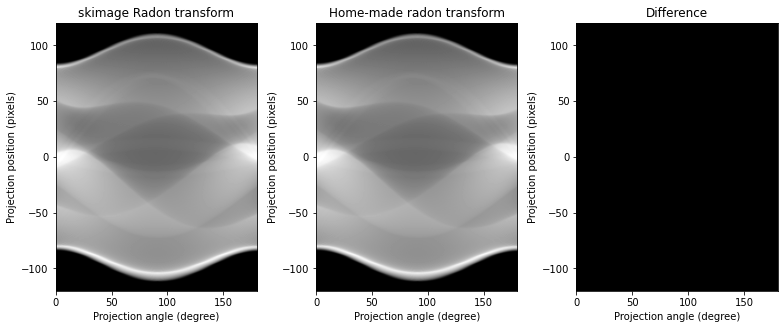

In [22]:
sino = RT2(sim)

printims([sinogram, sino, sinogram-sino],
         titles=["skimage Radon transform", "Home-made radon transform", "Difference"],
         xlabels=["Projection angle (degree)"]*3,
         ylabels=["Projection position (pixels)"]*3,
         extents=[(0, 180.0, -sinogram.shape[0]/2, sinogram.shape[0]/2)]*3)

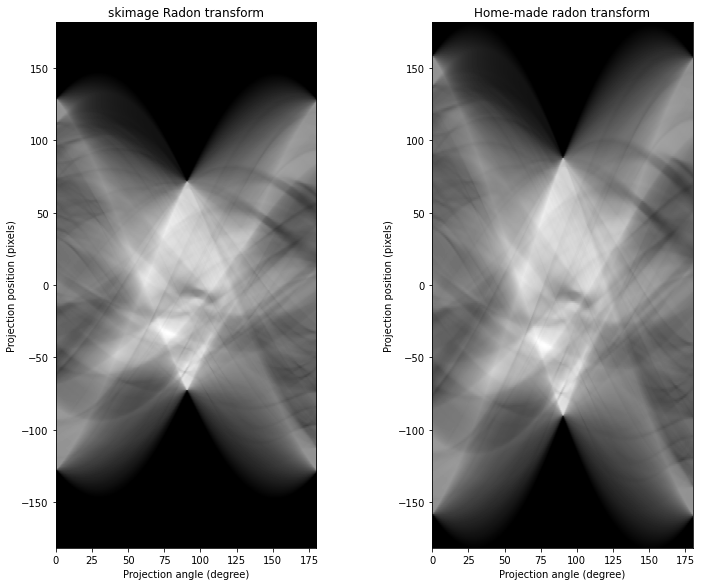

In [23]:
sino2 = RT2(sim2, pad="small")

printims([sinogram2, sino2],
         titles=["skimage Radon transform", "Home-made radon transform"],
         xlabels=["Projection angle (degree)"]*2,
         ylabels=["Projection position (pixels)"]*2,
         extents=[(0, 180.0, -sinogram2.shape[0]/2, sinogram2.shape[0]/2)]*2)

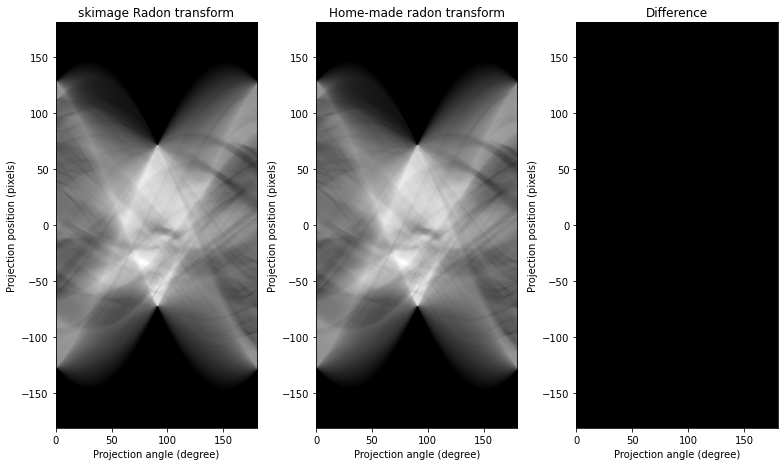

In [24]:
sino3 = RT2(sim2, pad="large")

printims([sinogram2, sino3, sinogram2-sino3],
         titles=["skimage Radon transform", "Home-made radon transform", "Difference"],
         xlabels=["Projection angle (degree)"]*3,
         ylabels=["Projection position (pixels)"]*3,
         extents=[(0, 180.0, -sinogram2.shape[0]/2, sinogram2.shape[0]/2)]*3)

In [25]:
print((sinogram == sino).all())
print((sinogram2 == sino3).all())

True
True


Les sinogrammes ainsi calculés sont exactement identiques à ceux calculés par `radon`. On utilisera donc `RT2` plutôt que `RT1` dans la suite.

#### Pourquoi un "sinogramme" ?

L'image obtenue en accolant les différentes projections $p_\theta(\rho),\;\theta\in[0,\dfrac\pi 2[$ est appelée sinogrammme car un objet ponctuel $\textbf x$ décentré dans l'image d'origine, se transforme en une sinusoïde dans le sinogramme.

En effet, si $\begin{pmatrix}x\\y\end{pmatrix}\in L$ fait un angle $\psi$ avec l'axe des ordonnées, on a $\rho = \sqrt{x^2+y^2}\cos(\psi+\frac\pi 2-\theta) = -\sqrt{x^2+y^2}\sin(\psi-\theta) = -\sqrt{x^2+y^2}\sin(-\arctan(\frac x y)-\theta) = \sqrt{x^2+y^2}\sin(\arctan(\frac x y)-\theta)$.

In [26]:
off_center_point = np.zeros((200,200))
off_center_point[49:51,49:51] = 1
off_center_point[149:151,149:151] = 1

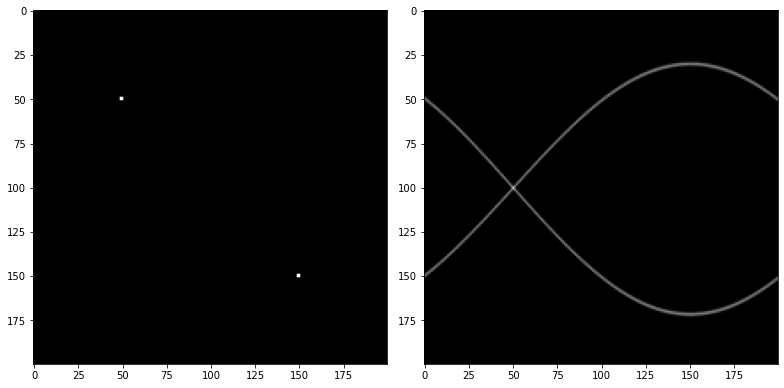

In [27]:
printims([off_center_point, RT2(off_center_point)])

## Inversion du sinogramme

### Inversion analytique théorique

Il existe deux méthodes d'inversion analytique très répandues : la méthode d'inversion directe, et la rétroprojection filtrée. L'une et l'autres se basent sur le théorème de la coupe centrale.

**Théorème de la coupe centrale**
Ce théorème donne une relation entre les "projections" de $f$ ($\equiv$ les transformées de Radon le long de toutes les droites d'un angle donné) et les fréquences spatiales (TF 2D) de $f$. Le théorème s'énonce comme suit :

La transformée de Fourier 1D d'un profil de Radonde $f$, $\mathcal R_\theta f\hspace{.5em}(\equiv\mathcal Rf(.,\theta))$, est **égale** à la TF 2D de $f$ le long d'une droite d'angle polaire $\theta$ et passant par le centre du domaine de Fourier.

En effet, en définissant la transformée de Fourier 2D de $f$ comme $\mathcal F(f)(\mathbf k) = \int_{\mathbb R^2}f(\mathbf x)\exp(-2i\pi\,\mathbf k\cdot\mathbf x)d\mathbf x$, on a :
$$
\begin{align}
\widehat{\mathcal R_\theta f}(\omega) &= \int_{\mathbb R^2}\mathcal R_\theta f(\rho)\exp(-2i\pi\,\omega\rho)d\rho\\
&= \iiint_{\mathbb R^3} f(x,y)\delta_\rho(x\cos\theta+y\sin\theta)\exp(-2i\pi\,\omega\rho)dxdyd\rho\\
&= \iint_{\mathbb R^3} f(x,y)\exp(-2i\pi\,(\omega x\cos\theta+\omega y\sin\theta))dxdy\\
&= \mathcal F(f)\begin{pmatrix}\omega\cos\theta\\ \omega\sin\theta\end{pmatrix}
\end{align}
$$

Ainsi, en notant $u=\omega\sin(\theta)$ et $v=\omega\cos(\theta)$, on a :
$$
\widehat{\mathcal R_\theta f}(\omega) = \widehat f(u,v)
$$

**Inversion directe**

Le théorème de la coupe centrale permet d'obtenir une formule d'inversion analytique exacte.

$$
\begin{align}
f(\mathbf x) & \overset{\Delta}{=} \mathcal F^\dagger\begin{pmatrix}x\\y\end{pmatrix}\\
&= \iint_{\mathbb R^2} \widehat f(u,v) \exp(2i\pi\,(ux+vy))dudv\\
&= \iint_{\mathbb R^2} \widehat{(\mathcal R_{\arctan(\frac u v)}f)}(\sqrt{u^2+v^2}) \exp(2i\pi\,(ux+vy))dudv
\end{align}
$$

Cette méthode nécessite d'effectuer autant de transformées de Fourier 1D qu'il y a d'angles de projection, puis une transformée de Fourier inverse 2D.

**Rétroprojection filtrée**

On introduit le changement de variable $\phi^{-1}:\begin{pmatrix}u\\v\end{pmatrix}\mapsto\begin{pmatrix}\omega \\ \theta\end{pmatrix}=\begin{pmatrix}\sqrt{u^2+v^2}\\ \arctan(\dfrac u v)\end{pmatrix}\quad$ ie $\phi\begin{pmatrix}\omega \\ \theta\end{pmatrix} \mapsto \begin{pmatrix}u\\v\end{pmatrix} = \begin{pmatrix}\omega\sin(\theta) \\ \omega\cos(\theta)\end{pmatrix}$.

On a $\left|\det\left(J_\phi\begin{pmatrix}\omega \\ \theta\end{pmatrix}\right)\right| = |\omega|$ donc :

$$
\begin{align}
f(\mathbf x) &= \iint_{\mathbb R^2} \widehat f(u,v) \exp(2i\pi\,(ux+vy))dudv\\
&= \int_0^\pi \int_{\mathbb R} \widehat{\mathcal R_\theta f}(\omega)\, |\omega| \exp(2i\pi\,\omega( x\cos\theta+y\sin\theta))\,d\omega d\theta
\end{align}
$$

Finalement, si on note 
$$\widetilde{\mathcal R_\theta f}(\rho)=\int_{\mathbb R} \widehat{\mathcal R_\theta f}(\omega)\, |\omega| \exp(2i\pi\,\omega\rho)\,d\theta$$
on a la formule de reconstruction :
$$
f(\mathbf x) = \int_0^\pi \widetilde{\mathcal R_\theta f}(x\cos\theta+y\sin\theta)\,d\theta
$$

On comprend que $f$ n'est pas reconstruite directement en intégrant ses projections (le cas échéant, on reconstruirait une version floue de f), mais à partir des $\widetilde{\mathcal R_\theta f}$, qui sont obtenus en multipliant les projections $\mathcal R_\theta f$ par un filtre rampe $\omega\mapsto|\omega|$ dans le domaine fréquentiel. Puisqu'une multiplication dans le domaine fréquentiel correspond à une convolution dans le domaine spatial, on a aussi :

$$
\begin{align}
\widetilde{\mathcal R_\theta f}(\rho) &= \int_\infty^\infty \mathcal R_\theta f(\rho-\tau)h(\tau)\,d\tau\\
&= (\mathcal R_\theta f *h)(\rho)
\end{align}
$$

où le noyau de convolution est donné par
$$
h(\tau) = \int_\infty^\infty |\omega| \exp(2i\pi\,\omega\tau)\,d\omega = \dfrac{-1}{2\pi^2\tau^2}
$$

Parmi les différentes méthodes qui existent pour inverser la transformée de Radon, la rétroprojection filtrée est la moins lourde (elle ne requiert que des opérations 1D), et donc la plus utilisée.

Cependant, en pratique, le signal est discret et bruité. Pour limiter le bruit, on multiplie donc généralement le filtre rampe par un filtre passe-bas ; l'inconvénient étant qu'on déteriore alors la résolution spatiale.

### Remarque sur les méthodes discrètes

Il existe deux grandes classes de méthodes d'inversion discrète de la transformée de Radon :
- les méthodes dites analytiques, qui consistent à partir des formules d'inversion continues et à les discrétiser : inversion directe discrète, rétroprojection filtrée discrète
- les méthodes dites algébriques, qui consistent à discrétiser directement l'équation de projection, ce qui fournit un (très grand) système linéaire à rédoudre. Etant donné la taille du système linéaire, il est nécessaire d'utiliser des méthodes itératives pour le résoudre : ART, SIRT, SART, ...

### Rétroprojection filtrée discrète

L'idée de la rétroprojection filtrée discrète est de discrétiser la formule de rétroprojection filtrée continue :

$$
\begin{align}
f(\mathbf x) &= \int_0^\pi \widetilde{\mathcal R_\theta f}(x\cos\theta+y\sin\theta)\,d\theta\\
&= \int_0^\pi (\mathcal R_\theta f *h)(x\cos\theta+y\sin\theta)\,d\theta
\end{align}
$$

On va appliquer le filtre dans le domaine féquentiel, afin de faire bon usage de l'efficacité de la FFT.

Bien que la rétroprojection filtrée dans le cas continu fournisse une reconstruction exacte de $f$, ce n'est plus vrai dans le cas discret, du fait de la finitude du nombre d'angles de projection. De plus, les données sont généralement bruitées - sans parler des artefacts dus à l'interpolation. Pour ces raisons, il est courant de multiplier le filtre rampe (passe-haut) par un filtre passe-bas, ce qui permet de limiter le bruit mais détériore en contrepartie la résolution spatiale.

#### Filtres

In [28]:
from utils import get_filter

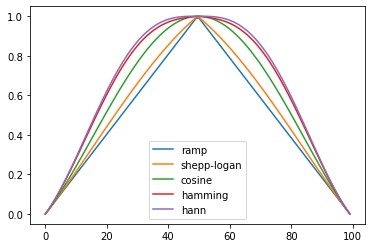

In [29]:
for filtre in ["ramp", "shepp-logan", "cosine", "hamming", "hann"]:
    plt.plot(get_filter(filtre, 100), label=filtre)
    plt.legend()
plt.show()

#### Première possibilité d'implémentation : par rotations successives à l'aide de `warp`

In [30]:
from utils import rotate_new

In [31]:
def backproj1(s, filtre="ramp", angles=None, apply_mask=True):
    N, p = np.shape(s)
    filtre = get_filter(filtre, N)
    result = np.zeros((N,N))
    
    if angles is None:
        angles = np.linspace(0., 180., N, endpoint=False)
    
    for angle, i in zip(angles, range(N)):
        tiles = np.array(rotate_new(np.tile(np.real(fft.ifft(fft.fft(s[:,i]) * filtre)),(N,1)).T, angle).T)
        result += tiles
    result = result-np.min(result)
    result = 255*result/np.max(result)
    
    if(apply_mask):
        center = N // 2
        mask = np.zeros((N,N))
        mask = cv2.circle(mask, (center, center), center, 255, -1)
        result[mask==0] = 0
        
    return result

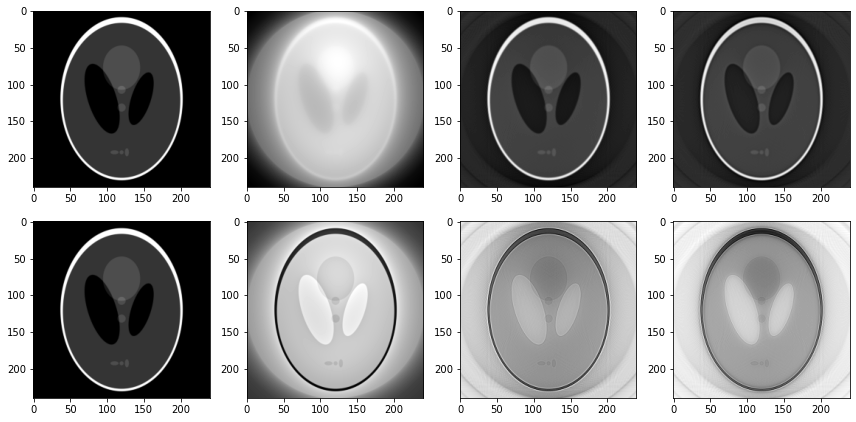

In [32]:
retro1 = backproj1(sino, filtre=None, apply_mask=False)
retro2 = backproj1(sino, filtre="ramp", apply_mask=False)
retro3 = backproj1(sino, filtre="hamming", apply_mask=False)
diff1 = retro1-sim
diff2 = retro2-sim
diff3 = retro3-sim

printims([sim, retro1, retro2, retro3, sim, diff1, diff2, diff3],
         nb_ims_per_row = 4, width=12, height=6)

In [33]:
for filtre in [None, "ramp", "shepp-logan", "cosine", "hamming", "hann"]:
    retro = backproj1(sino, filtre=filtre)
    print("FBP RMS reconstruction error ({}): {}".format(filtre, np.sqrt(np.mean((retro-sim)**2))))

FBP RMS reconstruction error (None): 138.44914381056992
FBP RMS reconstruction error (ramp): 19.025973160891827
FBP RMS reconstruction error (shepp-logan): 17.841902201885073
FBP RMS reconstruction error (cosine): 19.761692724931113
FBP RMS reconstruction error (hamming): 22.544502778975644
FBP RMS reconstruction error (hann): 23.033789932283693


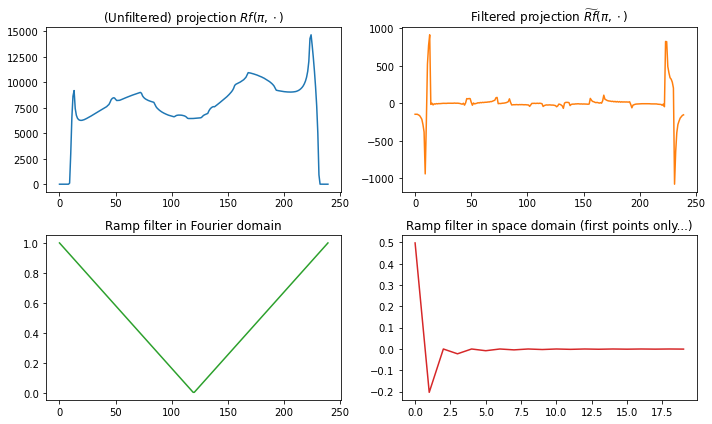

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
ramp_filter = get_filter("ramp", sino.shape[0])
axs[0, 0].plot(sino[:,120])
axs[0, 0].set_title(r'(Unfiltered) projection $Rf(\pi,\cdot)$')
axs[0, 1].plot(np.real(fft.ifft(fft.fft(sino[:,120]) * ramp_filter)), 'tab:orange')
axs[0, 1].set_title(r'Filtered projection $\widetilde{Rf}(\pi,\cdot)$')
axs[1, 0].plot(1-ramp_filter, 'tab:green')
axs[1, 0].set_title('Ramp filter in Fourier domain')
axs[1, 1].plot(np.real(fft.ifft(ramp_filter))[:20], 'tab:red')
axs[1, 1].set_title('Ramp filter in space domain (first points only...)')
fig.tight_layout()

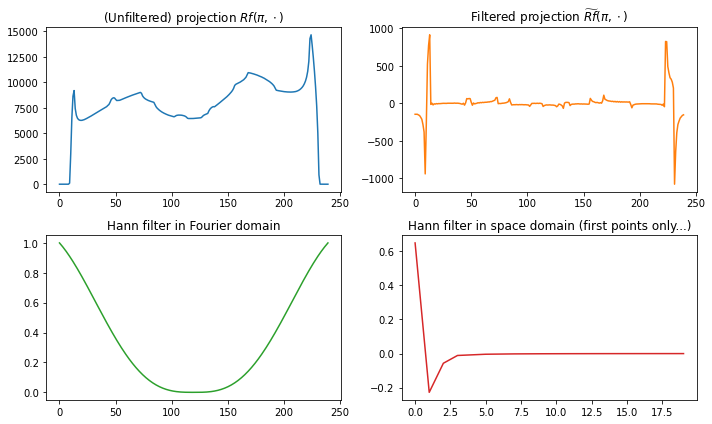

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
filtre = get_filter("hann", sino.shape[0])
axs[0, 0].plot(sino[:,120])
axs[0, 0].set_title(r'(Unfiltered) projection $Rf(\pi,\cdot)$')
axs[0, 1].plot(np.real(fft.ifft(fft.fft(sino[:,120]) * ramp_filter)), 'tab:orange')
axs[0, 1].set_title(r'Filtered projection $\widetilde{Rf}(\pi,\cdot)$')
axs[1, 0].plot(1-filtre, 'tab:green')
axs[1, 0].set_title('Hann filter in Fourier domain')
axs[1, 1].plot(np.real(fft.ifft(filtre))[:20], 'tab:red')
axs[1, 1].set_title('Hann filter in space domain (first points only...)')
fig.tight_layout()

#### Deuxième possibilité d'implémentation : changement de coordonnées dans une "matrice de projection"

**Construction "au brouillon"**

In [36]:
sssim = rescale(im, scale=.02, preserve_range=True, mode='reflect')
sssino = RT2(sssim)
n = sssim.shape[0]

x = np.arange(n)-n/2
y = x.copy()
X, Y = np.meshgrid(x, y)

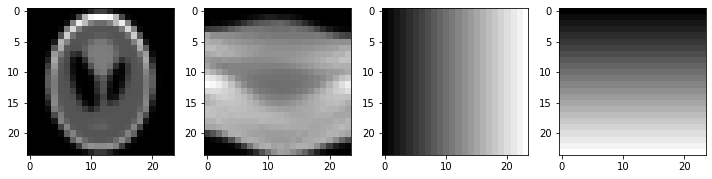

(24, 24)


In [37]:
printims([sssim, sssino, X, Y], nb_ims_per_row=4, width=10)
print(sssim.shape)

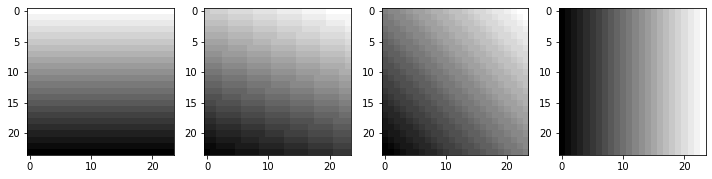

In [38]:
theta = 0
Xrot1 = np.round(X*np.sin(theta)-Y*np.cos(theta)+n/2).astype('int')
theta = np.pi/12
Xrot2 = np.round(X*np.sin(theta)-Y*np.cos(theta)+n/2).astype('int')
theta = np.pi/4
Xrot3 = np.round(X*np.sin(theta)-Y*np.cos(theta)+n/2).astype('int')
theta = np.pi/2
Xrot4 = np.round(X*np.sin(theta)-Y*np.cos(theta)+n/2).astype('int')
printims([Xrot1, Xrot2, Xrot3, Xrot4], nb_ims_per_row=4, width=10)

In [39]:
m0, m1 = np.where((Xrot3 >= 0) & (Xrot3 <= (n-1)))
Xrot3[m0,m1].shape

(527,)

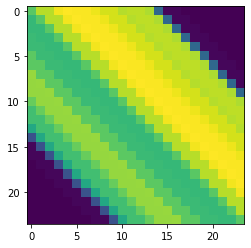

In [40]:
test = np.zeros((n,n))
test[m0, m1] = sssino[:,int(n*45/180)][Xrot3[m0,m1]]
plt.imshow(test)
plt.show()

In [41]:
def backproj2(s, filtre="ramp", angles=None, apply_mask=True):
    N = s.shape[0]
    
    if angles is None:
        angles = np.linspace(-np.pi/2, np.pi/2, N, endpoint=False)
    else:
        angles = np.deg2rad(angles)
    
    rec = np.zeros((N, N))
    filtre = get_filter(filtre, N)
    
    x = np.arange(N)-N/2 # create coordinate system centered at (0,0) =: (N/2,N/2)
    y = x.copy()
    X, Y = np.meshgrid(x, y)

    p = len(angles)
    for angle, i in zip(angles, range(p)):
        # Xrot est une matrice de meme dimension que l'image, definie comme :
        # Xrot[i,j] contient l'abscisse i' qu'aurait le point (i,j) si on tournait
        # l'image de (angle-pi/2) dans le sens anti-trigonometrique autour de son
        # centre. Les lignes de niveau de Xrot sont donc des droites faisant avec
        # l'axe des ordonnees un angle (pi/2 - (angle-pi/2) = pi-angle), soit un
        # angle pi/2-angle avec l'axe des abscisses
        Xrot = np.round(X*np.sin(angle)-Y*np.cos(angle)+N/2).astype('int')
        m0, m1 = np.where((Xrot >= 0) & (Xrot <= (N-1))) 
        # m0, m1 contiennent les coordonnees des coordonnees valides
        #proj = s[:,i] # projection pour l'angle courant
        proj = np.real(fft.ifft(fft.fft(s[:,i]) * filtre))
        
        current_rec = np.zeros((N,N))
        current_rec[m0, m1] = proj[Xrot[m0, m1]] # current_rec est une matrice qui
        # contient, en toutes les coordonnees (x, y) = (m0[a], m1[a]) dans l'image
        # des coordonnees d'abscisse valide (c'est-a-dire entre 0 et N) des points
        # de l'image tournee, la valeur du sinogramme pour l'abscisse en question
        # dans l'image tournee (ie la valeur du sinogramme en le bon rho)
        rec += current_rec
        
    rec = np.flip(rec, 1) - np.min(rec)
    rec = rec/np.max(rec)*255
    
    if(apply_mask):
        center = N // 2
        mask = np.zeros((N,N))
        mask = cv2.circle(mask, (center, center), center, 255, -1)
        rec[mask==0] = 0
        
    return rec

In [42]:
reconstruction = backproj2(sino, filtre="ramp", apply_mask=False)

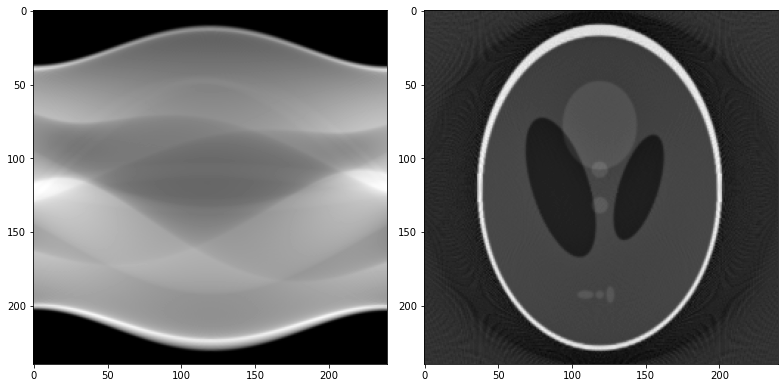

In [43]:
printims([sino, reconstruction])

In [44]:
for filtre in [None, "ramp", "shepp-logan", "cosine", "hamming", "hann"]:
    retro = backproj2(sino, filtre=filtre)
    print("FBP RMS reconstruction error ({}): {}".format(filtre, np.sqrt(np.mean((retro-sim)**2))))

FBP RMS reconstruction error (None): 115.34942301857895
FBP RMS reconstruction error (ramp): 28.666448876355453
FBP RMS reconstruction error (shepp-logan): 29.60678294226577
FBP RMS reconstruction error (cosine): 32.1862724043929
FBP RMS reconstruction error (hamming): 34.807294799737306
FBP RMS reconstruction error (hann): 35.3083697242618


### SART (Simultaneous Algebraic Reconstruction Technique)

On commence par essayer la fonction `iradon_sart` de `skimage`, qui est une implémentation "maligne" de la méthode itérative ART, qui converge plus rapidement (donne une bonne reconstruction dès la première itération).

On donnera ensuite une implémentation plus basique d'ART, dont on attend, au prix de plus d'itérations, qu'elle donne un résultat visuellement comparable à SART.

In [45]:
angles = np.linspace(0., 180., max(sim.shape), endpoint=False)

reconstruction_sart = np.clip(iradon_sart(sino, theta=angles),0.,255.)
diff = reconstruction_sart - sim
print("SART (1 iteration) RMS reconstruction error: "
      f"{np.sqrt(np.mean(diff**2)):.3g}")

reconstruction_sart2 = np.clip(iradon_sart(sino, theta=angles,
                                   image=reconstruction_sart),0.,255.)
diff2 = reconstruction_sart2 - sim
print("SART (2 iterations) RMS reconstruction error: "
      f"{np.sqrt(np.mean(diff2**2)):.3g}")

reconstruction_sart3 = np.clip(iradon_sart(sino, theta=angles,
                                   image=reconstruction_sart2),0.,255.)
diff3 = reconstruction_sart3 - sim
print("SART (3 iterations) RMS reconstruction error: "
      f"{np.sqrt(np.mean(diff3**2)):.3g}")

SART (1 iteration) RMS reconstruction error: 5.56
SART (2 iterations) RMS reconstruction error: 3.36
SART (3 iterations) RMS reconstruction error: 2.5


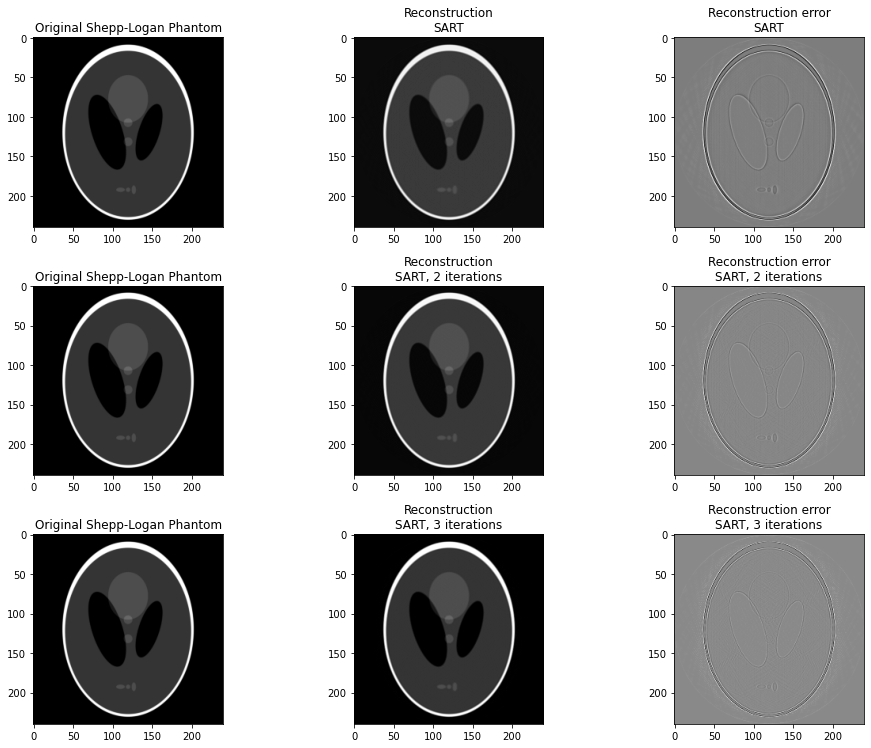

In [46]:
printims([sim, reconstruction_sart, diff, sim, reconstruction_sart2, diff2,
          sim, reconstruction_sart3, diff3],
         nb_ims_per_row = 3,
         width = 14,
         titles=["Original Shepp-Logan Phantom", "Reconstruction\nSART", "Reconstruction error\nSART",
                 "Original Shepp-Logan Phantom", "Reconstruction\nSART, 2 iterations",
                 "Reconstruction error\nSART, 2 iterations",
                 "Original Shepp-Logan Phantom", "Reconstruction\nSART, 3 iterations",
                 "Reconstruction error\nSART, 3 iterations"])

In [47]:
def niter_sart(s, image, angles, niter, plot=False):
    errors = np.array([])
    reconstruction_sart = np.clip(iradon_sart(s, theta=angles),0.,255.)
    diff = reconstruction_sart - image
    error = np.sqrt(np.mean(diff**2))
    errors = np.append(errors, error)
    print("SART (1 iteration) RMS reconstruction error: {}".format(error)) if not plot else None
    for i in range(niter-1):
        reconstruction_sart = np.clip(iradon_sart(s, theta=angles, image=reconstruction_sart),0.,255.)
        diff = reconstruction_sart - image
        error = np.sqrt(np.mean(diff**2))
        errors = np.append(errors, error)
        print("SART ({} iterations) RMS reconstruction error: {}".format(i+2, error)) if not plot else None
    if plot:
        plt.plot(errors)
        plt.title("SART reconstruction RMS error")
        plt.xlabel("Iterations")
        plt.ylabel("RMS error")
        plt.show()
    return errors, reconstruction_sart

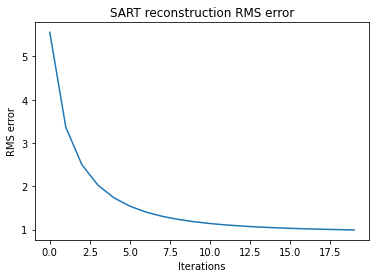

In [48]:
angles = np.linspace(0., 180., max(sim.shape), endpoint=False)
errors, reconstruction_sart10 = niter_sart(sino, sim, angles, 20, plot=True)

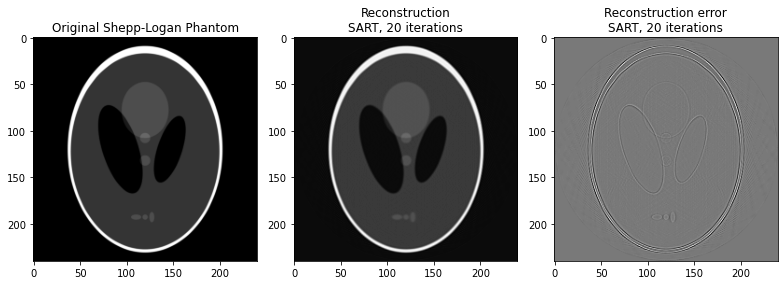

RMS reconstruction error: 3.5151757216293587


In [49]:
diff = sim-reconstruction_sart
printims([sim, reconstruction_sart, diff],
         nb_ims_per_row = 3,
         width = 11,
         titles=["Original Shepp-Logan Phantom", "Reconstruction\nSART, 20 iterations",
                 "Reconstruction error\nSART, 20 iterations"])
print("RMS reconstruction error: {}".format(np.sqrt(np.mean(diff**2))))

In [50]:
newsim2 = rotate_custom(sim2, 0, "large") # adds padding
angles = np.linspace(0., 180., 256, endpoint=False)

reconstruction_sart = iradon_sart(sino3, theta=angles)
diff = reconstruction_sart - newsim2
print("SART (1 iteration) RMS reconstruction error: "
      f"{np.sqrt(np.mean(diff**2)):.3g}")

reconstruction_sart2 = iradon_sart(sino3, theta=angles,
                                   image=reconstruction_sart)
diff2 = reconstruction_sart2 - newsim2
print("SART (2 iterations) RMS reconstruction error: "
      f"{np.sqrt(np.mean(diff2**2)):.3g}")
reconstruction_sart3= iradon_sart(sino3, theta=angles,
                                   image=reconstruction_sart2)
diff3 = reconstruction_sart3 - newsim2
print("SART (3 iterations) RMS reconstruction error: "
      f"{np.sqrt(np.mean(diff3**2)):.3g}")

SART (1 iteration) RMS reconstruction error: 12.1
SART (2 iterations) RMS reconstruction error: 8.48
SART (3 iterations) RMS reconstruction error: 6.75


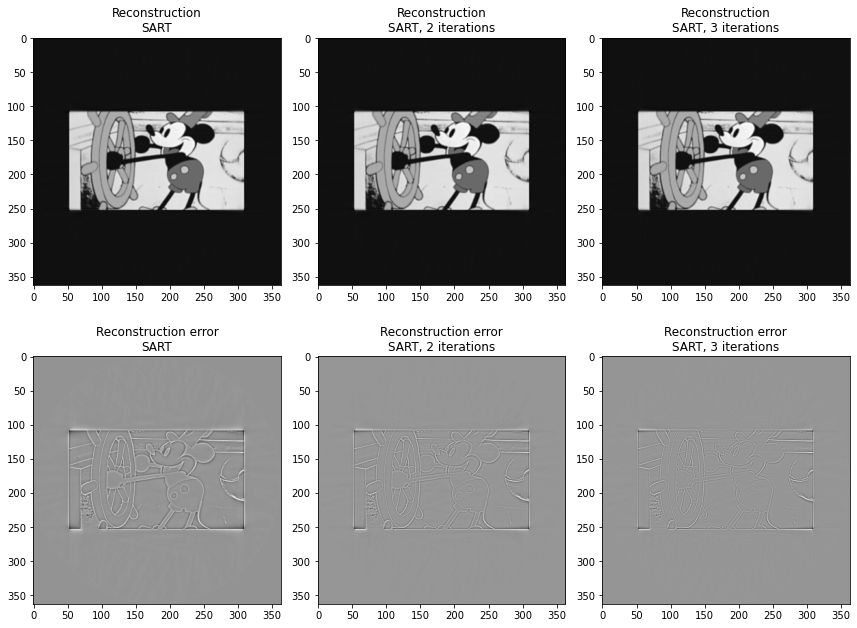

In [51]:
printims([reconstruction_sart, reconstruction_sart2, reconstruction_sart3, diff, diff2, diff3],
         nb_ims_per_row = 3,
         width = 12,
         titles=["Reconstruction\nSART", "Reconstruction\nSART, 2 iterations", 
                 "Reconstruction\nSART, 3 iterations",
                 "Reconstruction error\nSART", "Reconstruction error\nSART, 2 iterations",
                 "Reconstruction error\nSART, 3 iterations"])

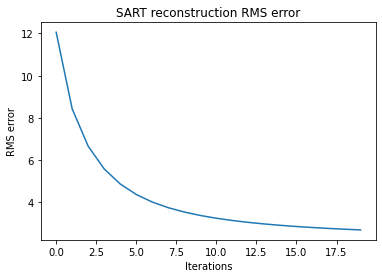

In [52]:
angles = np.linspace(0., 180., 256, endpoint=False)
errors, reconstruction_sart = niter_sart(sino3, newsim2, angles, 20, plot=True)

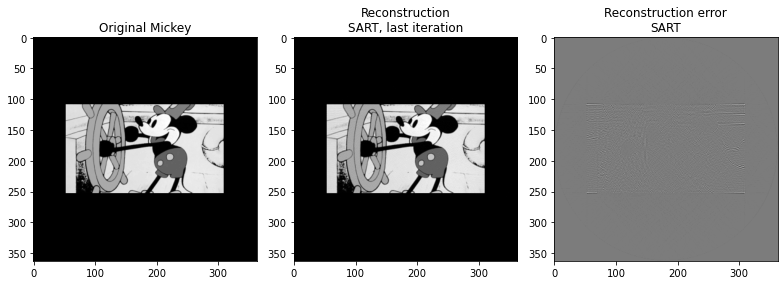

RMS reconstruction error: 2.696895188642717


In [53]:
diff = newsim2-reconstruction_sart
printims([newsim2, reconstruction_sart, diff],
         nb_ims_per_row = 3,
         width = 11,
         titles=["Original Mickey", "Reconstruction\nSART, last iteration",
                 "Reconstruction error\nSART"])
print("RMS reconstruction error: {}".format(np.sqrt(np.mean(diff**2))))

### Codage d'ART (Algebraic Reconstruction Technique)

Rappel : $\mathcal{R}f\left(\theta, \rho\right) = \mathcal{R}\left(\textrm{Rot}_{\theta}f\right)(0, \rho)$. Ainsi, l'angle $0$ (la première colonne) du sinogramme contient les projections le long de droites verticales ; l'angle $\theta$ contient les projections le long de droites verticales de l'image tournée de $\theta$ dans le sens anti-trigonométrique, soit encore le long de droites d'angles $\theta+\dfrac\pi 2$ sur l'image d'origine.

In [54]:
ssino = RT2(ssim)

In [55]:
def ART(s, niter=1, angles=None, apply_mask=True, im_ref=None, plot=True):
    N, p = np.shape(s)
    reconstructed_image = np.zeros((N,N))
    errors = [] if im_ref is not None else None
    sino_test = np.zeros((N,p))
    center = N // 2
    mask = np.zeros((N,N))
    mask = cv2.circle(mask, (center, center), center, 255, -1)
    
    if angles is None:
        angles = np.linspace(0., 180., p, endpoint=False)
    perm = np.random.permutation(p)
    
    for k in range(niter):
        # for i, angle in enumerate(np.deg2rad(angles)):
        for i in perm:
            angle = np.deg2rad(angles[i])
            
            sino_test = RT2(reconstructed_image)
            cos_a, sin_a = np.cos(angle), np.sin(angle)
            Tr = np.array([[cos_a, -sin_a, -center * (cos_a - sin_a - 1)],
                          [sin_a, cos_a, -center * (cos_a + sin_a - 1)],
                          [0, 0, 1]])
            
            # On fait une erreur ici, en divisant systématiquement par N, alors qu'avec les
            # rotations, les rayons ne traversent pas nécessairement N pixels...
            # TODO: Il faudra corriger ça
            reconstructed_image += warp(np.tile((s[:,i]-sino_test[:,i])/N, (N,1)), Tr, clip=False)
            
        reconstructed_image[mask==0] = 0 if apply_mask else None
        errors = np.append(errors,np.sqrt(np.mean((reconstructed_image-im_ref)**2))) if im_ref is not None else None
    
    if im_ref is not None:
        if plot:
            plt.plot(errors)
            plt.title("ART reconstruction RMS error")
            plt.xlabel("Iterations")
            plt.ylabel("RMS error")
            plt.show()
        return errors, np.clip(reconstructed_image, 0, 255)
    else:
        return np.clip(reconstructed_image, 0, 255)

In [56]:
rec = ART(ssino, 1)

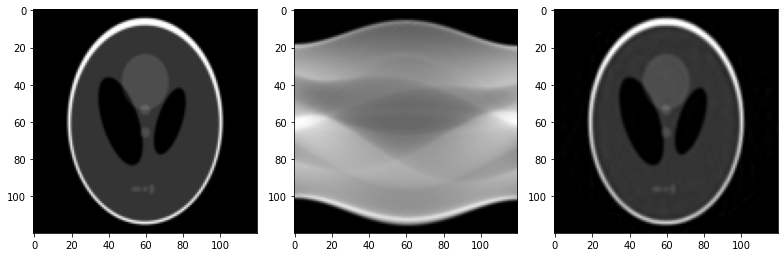

In [57]:
printims([ssim, ssino, rec])

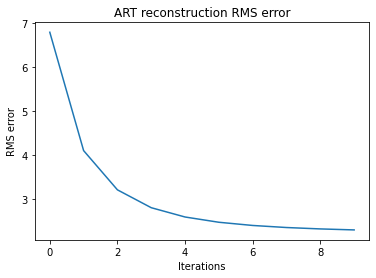

In [58]:
errors, rec10 = ART(ssino, 10, im_ref=ssim)

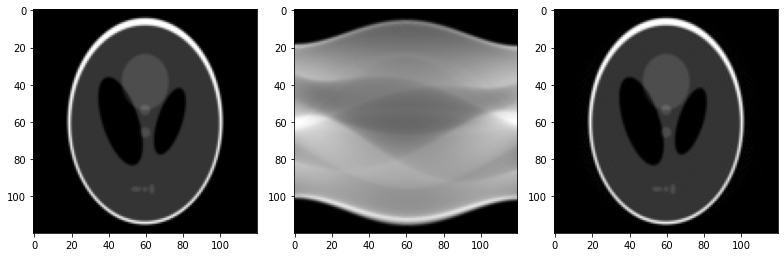

In [59]:
printims([ssim, ssino, rec10])

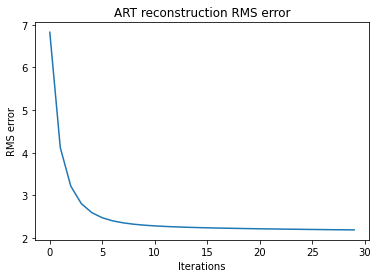

In [60]:
errors, rec30 = ART(ssino, 30, im_ref=ssim)

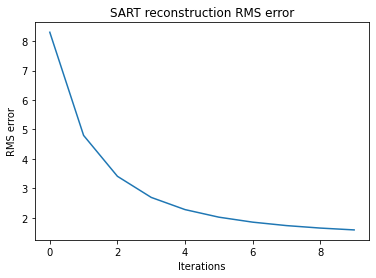

In [61]:
angles = np.linspace(0., 180., max(ssim.shape), endpoint=False)
errors, reconstruction_sart10 = niter_sart(ssino, ssim, angles, 10, plot=True)

In [62]:
angles = np.linspace(0., 180., max(ssim.shape), endpoint=False)

reconstruction_sart = np.clip(iradon_sart(ssino, theta=angles),0.,255.)
diff1 = reconstruction_sart - ssim
diff5 = reconstruction_sart10 - ssim
print("SART (1 iteration) RMS reconstruction error: "
      f"{np.sqrt(np.mean(diff1**2)):.3g}")
print("SART (10 iterations) RMS reconstruction error: "
      f"{np.sqrt(np.mean(diff5**2)):.3g}")
diff2 = rec - ssim
diff3 = rec10 - ssim
diff4 = rec30 - ssim
print("ART (1 iteration) RMS reconstruction error: "
      f"{np.sqrt(np.mean(diff2**2)):.3g}")
print("ART (10 iteration) RMS reconstruction error: "
      f"{np.sqrt(np.mean(diff3**2)):.3g}")
print("ART (30 iteration) RMS reconstruction error: "
      f"{np.sqrt(np.mean(diff4**2)):.3g}")

SART (1 iteration) RMS reconstruction error: 8.3
SART (10 iterations) RMS reconstruction error: 1.59
ART (1 iteration) RMS reconstruction error: 6.54
ART (10 iteration) RMS reconstruction error: 1.93
ART (30 iteration) RMS reconstruction error: 1.82


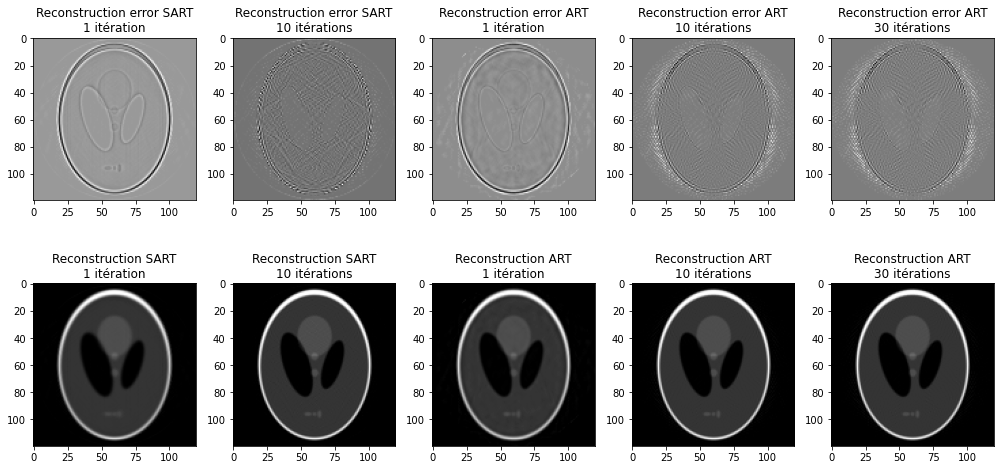

In [63]:
printims([diff1, diff5, diff2, diff3, diff4,
          reconstruction_sart, reconstruction_sart10, rec, rec10, rec30],
         nb_ims_per_row = 5,
         width = 14, height = 7,
         titles=["Reconstruction error SART\n1 itération",
                 "Reconstruction error SART\n10 itérations",
                 "Reconstruction error ART\n1 itération",
                 "Reconstruction error ART\n10 itérations",
                 "Reconstruction error ART\n30 itérations",
                 "Reconstruction SART\n1 itération",
                 "Reconstruction SART\n10 itérations",
                 "Reconstruction ART\n1 itération",
                 "Reconstruction ART\n10 itérations",
                 "Reconstruction ART\n30 itérations"])